# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
print(soup.prettify())

<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="" name="description"/>
  <title>
   Mars Temperature Data
  </title>
  <link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
  <link href="css/temp.css" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <main>
   <div class="container py-4">
    <header class="pb-3 mb-4 border-bottom">
     <a class="d-flex align-items-center text-dark text-decoration-none" href="/">
      <span class="fs-4">
       Mission To Mars
      </span>
     </a>
    </header>
    <div class="p-5 mb-4 bg-light rounded-3">
     <div class="container-fluid py-5">
      <h1 class="display-5 fw-bold">
       Mars Temperature Data
      </h1>
      <p class="col-md-8 fs-4">
       This is Mars data.
      </p>
      <table class="table">
       <tbody>
        <tr>
         <th>
          id
         </th>
         <th>
          terrestrial_date
     

In [6]:
# Extract all rows of data
tables = soup.find_all('table', class_='table')
tables


[<table class="table">
 <tbody><tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
mars_temp = []

# Loop through the scraped data to create a list of rows
for table in tables:
    # Extract headers
    headers = table.find_all('th')  
    header_texts = [header.get_text(strip=True) for header in headers]  
    
    # Append headers to mars_temp
    mars_temp.append(header_texts)  

    # Extract data rows
    rows = table.find_all('tr')[1:]  # Skip the header row if needed
    for row in rows:
        cells = row.find_all('td')
        cell_texts = [cell.get_text(strip=True) for cell in cells]
    #Append rows to mars_temp. This way both headers and rows are now included in the list.     
        mars_temp.append(cell_texts)

# Print the result
print(mars_temp)


[['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'], ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', 

In [8]:
print(header_texts)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

mars_df=pd.DataFrame(mars_temp, columns=header_texts)
print(mars_df)

        id  terrestrial_date   sol   ls  month  min_temp  pressure
0       id  terrestrial_date   sol   ls  month  min_temp  pressure
1        2        2012-08-16    10  155      6     -75.0     739.0
2       13        2012-08-17    11  156      6     -76.0     740.0
3       24        2012-08-18    12  156      6     -76.0     741.0
4       35        2012-08-19    13  157      6     -74.0     732.0
...    ...               ...   ...  ...    ...       ...       ...
1863  1889        2018-02-23  1973  133      5     -78.0     730.0
1864  1892        2018-02-24  1974  134      5     -77.0     729.0
1865  1894        2018-02-25  1975  134      5     -76.0     729.0
1866  1893        2018-02-26  1976  135      5     -77.0     728.0
1867  1895        2018-02-27  1977  135      5     -77.0     727.0

[1868 rows x 7 columns]


In [10]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1868 non-null   object
 1   terrestrial_date  1868 non-null   object
 2   sol               1868 non-null   object
 3   ls                1868 non-null   object
 4   month             1868 non-null   object
 5   min_temp          1868 non-null   object
 6   pressure          1868 non-null   object
dtypes: object(7)
memory usage: 102.3+ KB


In [12]:
print(mars_df['id'].unique())

['id' '2' '13' ... '1894' '1893' '1895']


In [37]:
# Print the first few entries in the 'terrestrial_date' column
print(mars_df['terrestrial_date'].head())
print(mars_df['sol'].head())

0          NaT
1   2012-08-16
2   2012-08-17
3   2012-08-18
4   2012-08-19
Name: terrestrial_date, dtype: datetime64[ns]
0     0
1    10
2    11
3    12
4    13
Name: sol, dtype: int64


In [38]:
# Drop rows where 'month' is NaN
mars_df = mars_df.dropna(subset=['month'])
mars_df = mars_df.dropna(subset=['sol'])

In [23]:

mars_df['month'] = pd.to_numeric(mars_df['month'], errors='coerce')
print(mars_df['month'].unique())

[nan  6.  7.  8.  9. 10. 11. 12.  1.  2.  3.  4.  5.]


In [28]:
# Change data types for data analysis


#mars_df['terrestrial_date']=pd.to_datetime(mars_df['terrestrial_date'])
# Convert 'terrestrial_date' to datetime with a specified format
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'], format='%Y-%m-%d', errors='coerce')
mars_df['sol'] = pd.to_numeric(mars_df['sol'], errors='coerce')
mars_df['sol'] = mars_df['sol'].fillna(0).astype(int)
mars_df['month'] = mars_df['month'].fillna(0).astype(int)
mars_df['min_temp'] = pd.to_numeric(mars_df['min_temp'], errors='coerce').astype(float)
mars_df['pressure'] = pd.to_numeric(mars_df['pressure'], errors='coerce').astype(float)
mars_df['ls'] = pd.to_numeric(mars_df['ls'], errors='coerce')
mars_df['ls'] = mars_df['ls'].fillna(0).astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)


In [29]:
# Confirm type changes were successful by examining data types again
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1868 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1868 non-null   int64         
 3   ls                1868 non-null   int64         
 4   month             1868 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 102.3+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [30]:
# 1. How many months are there on Mars?
# Group by 'month' and count the number of entries in each group
month_counts = mars_df.groupby('month').size()

# Print the result
print(month_counts)



month
0       1
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
dtype: int64


In [50]:
# 2. How many Martian days' worth of data are there?
martian_days=mars_df['terrestrial_date'].count()
print(f' There are {martian_days} Martian days.')

 There are 1867 Martian days.


In [60]:
# 3. What is the average low temperature by month?
# Group by 'month' and calculate the average of 'min_temp'
average_temp_min = mars_df.groupby('month')['min_temp'].mean()

# Print the result
print(average_temp)


month
0            NaN
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


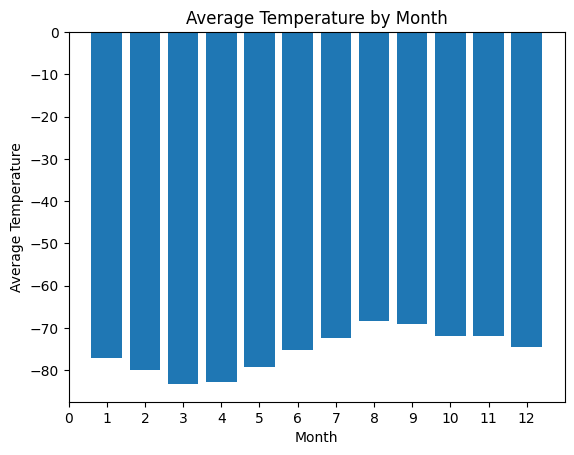

In [63]:
# Plot the average temperature by month
plt.bar(average_temp_min.index, average_temp_min.values)
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.title('Average Temperature by Month')
plt.xticks(ticks=average_temp_min.index)  
plt.savefig('Resources/average_temp_bar.png')
plt.show()

In [36]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = average_temp.idxmin()
coldest_temp = average_temp.min()

# Find the hottest month (maximum average temperature)
hottest_month = average_temp.idxmax()
hottest_temp = average_temp.max()


print(f"The coldest month is month {coldest_month} with an average temperature of {coldest_temp:.2f} degrees.")
print(f"The hottest month is month {hottest_month} with an average temperature of {hottest_temp:.2f} degrees.")




The coldest month is month 3 with an average temperature of -83.31 degrees.
The hottest month is month 8 with an average temperature of -68.38 degrees.


In [43]:
# 4. Average pressure by Martian month

average_pressure = mars_df.groupby('month')['pressure'].mean()
print(average_temp)

month
0            NaN
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


In [51]:
average_pressure = average_pressure.sort_index()

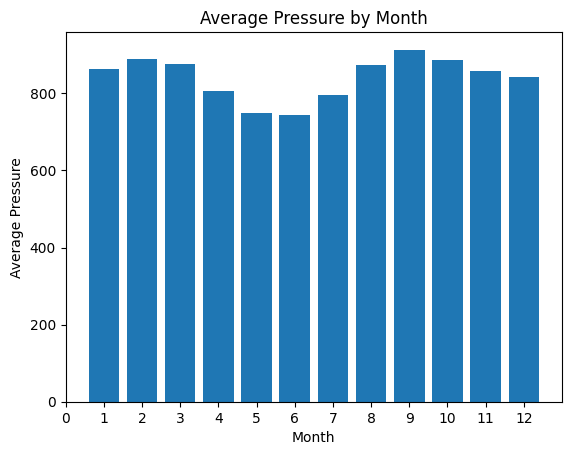

In [64]:
# Plot the average pressure by month
plt.bar(average_pressure.index, average_pressure.values)
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Month')
plt.xticks(ticks=average_pressure.index)  
plt.ylim(bottom=0)
plt.savefig('Resources/average_pressure_bar.png')
plt.show()


In [55]:
# 5. How many terrestrial (earth) days are there in a Martian year?


# Calculate the range of Earth dates
min_date = mars_df['terrestrial_date'].min()
max_date = mars_df['terrestrial_date'].max()
total_earth_days = (max_date - min_date).days

# Calculate the number of Martian sols
total_sols = mars_df['sol'].max() - mars_df['sol'].min() + 1

# Calculate average Earth days per Martian sol
average_earth_days_per_sol = total_earth_days / total_sols
print(average_earth_days_per_sol)

1.0217391304347827


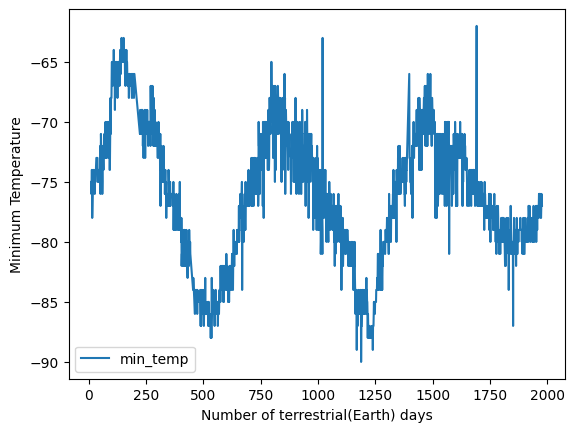

In [68]:
sorted_sol = mars_df.sort_values('sol')

sorted_sol.plot(x='sol', y='min_temp', xlabel = 'Number of terrestrial(Earth) days', ylabel = "Minimum Temperature")
plt.savefig('Resources/terrestial_days.png')

#Based on the peaks, it seems that Mars orbits the Sun around 3 times per Earth year. 

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [66]:
# Write the data to a CSV
mars_df.to_csv('Resources/mars_data.csv')

In [67]:
browser.quit()